Accuracy : 0.765


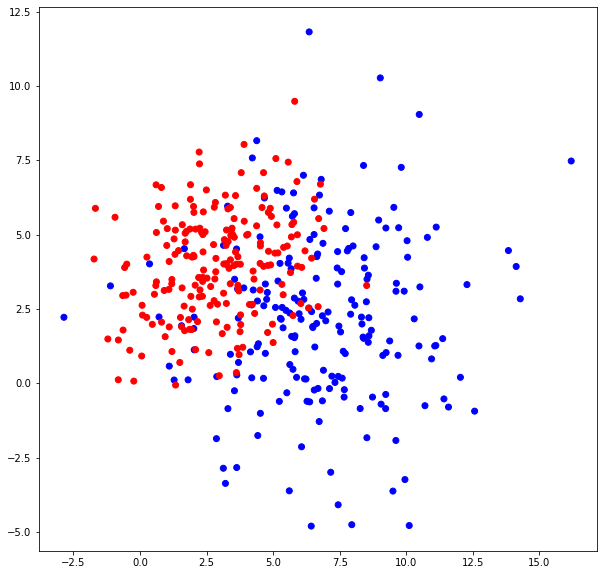

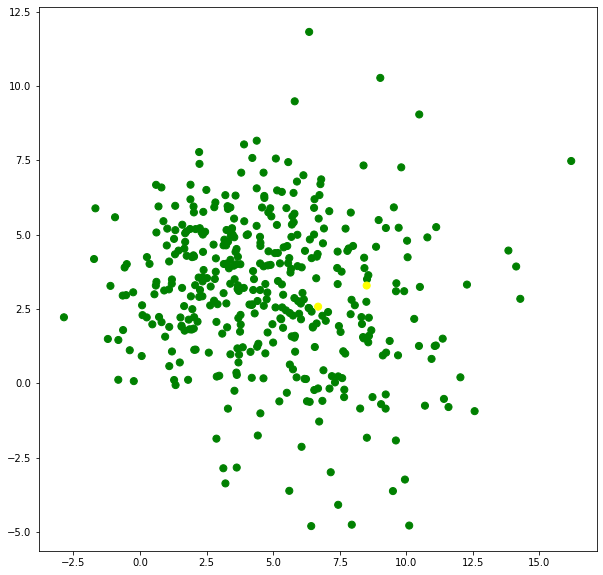

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Activation function used to map any real value between 0 and 1
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

#Scalar product of weights and features
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

#Log. regression 
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        #unit array of dimension of the number of input parameters
        intercept = np.ones((features.shape[0], 1)) #all the parameters are classified as 0
        features = np.hstack((intercept, features)) #intercept+features
        
    weights = np.zeros(features.shape[1]) #all the parameters are classified as 0

    #log regression formulas
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        output_error_signal = target - predictions
        # Computes the gradient of the cost function
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        if step % 10000 == 0:
            log_likelihood(features, target, weights)
        
    return weights

#data
num_observations = 200

x = np.random.multivariate_normal([7, 2], [[7, .2],[.2, 7]], num_observations)
y = np.random.multivariate_normal([3, 4], [[3, .4],[.4, 3]], num_observations)

X_train = np.vstack((x, y)).astype(np.float32)
Y_train = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

#setting metrics space and view
cmap0 = ListedColormap(['blue','red'])
plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1],
            c = Y_train, cmap=cmap0)

#
weights = logistic_regression(X_train, Y_train,
                     num_steps = 10000, learning_rate = 0.01, add_intercept=True)

data_with_intercept = np.hstack((np.ones((X_train.shape[0], 1)),
                                 X_train))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

#Accuracy
print ('Accuracy : {0}'.format((preds == Y_train).sum().astype(float) / len(preds)))

#Accuracy metrics
cmap1 = ListedColormap(['green','yellow'])
plt.figure(figsize = (10, 10))
plt.scatter(X_train[:, 0], X_train[:, 1],
            c = preds == Y_train - 1, s = 50, cmap=cmap1)
plt.show()